# Functions to export

In [1]:
def column_distplot(dataframe, column, xlabel=None): 
    '''Plot the histogram of a column using Seaborn'''
    # Set Figure
    sns.set(rc={'figure.figsize':(10,5)},style="white", context="talk")

    # Plot
    column = column
    data = dataframe[column][~dataframe[column].isna()]
    ax = sns.distplot(data);

    # Title and Axis
    ax.set_title("Histogram of the fighters' {}".format(column));
    if type(xlabel)==str:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(str(column).capitalize())
    sns.despine()
    
    col_cap = str(column).capitalize()
    print("{} Skewness: {}".format(col_cap, round(dataframe[column].skew(), 2)))
    print("{} Kurtosis: {}".format(col_cap, round(dataframe[column].kurt(), 2)))
    
    print('{} Mean: {}'.format(col_cap, round(data.mean(), 2)))
    print('{} Median: {}'.format(col_cap, data.median()))

In [2]:
def parse_height(height):
    '''Splits the height value into feet and inches'''
    ht_ = height.split(" ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_

## Cleaning fighter_home_country data

In [3]:
def generalize_columns(df):
    '''Make the column headings lowercase and generalized (remove the B_ and R_)'''
    # Make lowercase
    df.columns = df.columns.str.lower()
    # Split on the _
    df_columns = df.columns.str.split("_")
    # Take the last word in the inner list
    df_columns = [el[-1] for el in df_columns]
    # Change the names of columns
    df.columns = df_columns
    
    return df

In [4]:
def clean_hometown(data_both_fighters):
    '''Cleans up the hometown column and returns the home_country alongside the name'''
    # Split the hometown column into 
    data_both_fighters['hometown'] = data_both_fighters['hometown'].str.split(" ")

    data_both_fighters.dropna(subset=['hometown'], inplace=True)

    for row in data_both_fighters['hometown']:
        # If the list ends in a space, pop it off
        if len(row[-1]) == 0:
            row.pop()
        # Replace [United, States] with [USA]
        if row[-1] == 'States':
            row[-1] = 'USA'
        # Change 'Michigan' to 'USA'
        if row[-1] == 'Michigan':
            row[-1] = 'USA'

    # Strip out the row to only the last element
    data_both_fighters['home_country']=list(map(lambda x: x[-1], data_both_fighters['hometown']))
    # Drop the 'hometown column'
    data_both_fighters.drop(columns='hometown', axis=1, inplace=True)
    
    # Reset the index
    data_both_fighters.reset_index(drop=True, inplace=True)
    
    return data_both_fighters

In [5]:
def clean_fighter_data(data):
    '''Cleans up the dataframe and returns the df with unique fighters names, home_country'''
    
    # Split dataframe into dataframe for the Blue fighter and another dataframe for the Red fighter
    data_b_fighter = data[['B_Name', 'B_HomeTown']]
    data_r_fighter = data[['R_Name', 'R_HomeTown']]
    
    # Change the column headings to lowercase and remove the B_ and R_
    [generalize_columns(df) for df in [data_b_fighter, data_r_fighter]]
    
    # Concatenate the Blue fighters data to the Red fighters data
    data_both_fighters = pd.concat([data_b_fighter, data_r_fighter], ignore_index=True)

    # Filter the data to only unique names
    data_both_fighters.drop_duplicates(subset='name', keep='first', inplace=True)
    
    clean_hometown(data_both_fighters)
    
    return data_both_fighters

In [6]:
def show_na_cols(dataframe):
    if dataframe.isna().sum().any():
        print('The columns with na values in the dataframe:')
        for column in dataframe.columns:
            cols_na = dataframe[column].isna().sum()
            if cols_na:
                print('\t{}:\t'.format(column), cols_na)
    else:
        print('There are no columns with na values in the dataframe')

In [7]:
def calc_age_at_fight(data, new_col_name, fighter_dob, date='date',):
    '''Calculate the age of a fighter at the time of the fight, based on their date of birth'''
    # Calculate the time difference between 2 dates (in days)
    data[new_col_name] = data['date'] - data[fighter_dob]
    # Remove the 'days' value in column
    data[new_col_name] /= np.timedelta64(1, 'D')
    # Convert form days to years
    data[new_col_name] //= 365

In [41]:
# Doesnt work
def drop_bouts_with_no_fighter_stats(data, fighters_data):
    '''Take out the bouts where we do not have data on both fighters'''
    
    original_bout_length = len(data)

    # Create a list of all the fighters' names
    name_list = fighters_data.index.tolist()

    # Create booleans for whether the name in fighter1/figther2 column appears in our list of fighter names
    f1_in_name_list = data['fighter1'].isin(name_list)
    f2_in_name_list = data['fighter2'].isin(name_list)

    # Drop out the rows where at least 1 of names does not appear in our fighter names list
    data = data[(f1_in_name_list) & (f2_in_name_list)]

    # Print the action we have carried out
    new_bout_length = len(data)
    print('We have reduced the number of bouts from {} to {}, as we do not have statistics for {} fighters'
          .format(original_bout_length, new_bout_length, original_bout_length-new_bout_length))
    
    return data 

# EDA & Data Cleaning - [Your Project Name Here]

## Local Code Imports - Do not delete

In [42]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# DO NOT REMOVE This
%reload_ext autoreload

In [74]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py
from src import make_data as mk
from src import visualize as viz
from src import model as mdl
from src import pandas_operators as po
from src import custom as cm

def test_src():
    mk.test_make_data()
    viz.test_viz()
    mdl.test_model()
    po.test_pandas()
    
    return 1

Using TensorFlow backend.


In [45]:
test_src()

In make_data
In Visualize
In Model
In pandas ops


1

## Code Imports

In [46]:
# Dataframes
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Calculating age of fighters
import datetime

In [47]:
datetime.date.today()

datetime.date(2019, 7, 30)

# Project Overview


## Background

UFC BACKGROUND

PROJECT OBJECTIVE

# Data Understanding

## Bouts Data

### Bouts Data  - Description

RESERVED FOR BOUTS DATA DESCRIPTION

#### Bouts Data - Data Dictionary

RESERVED SPACE FOR BOUTS DATA DICTIONARY

### Bouts Data - Import and Summary

In [48]:
data_bouts = pd.read_csv('../data/raw/ufc_bouts.csv', parse_dates=['date'])
data_bouts.head(3)

,bout_id,event_name,date,location,attendance,result,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,end_time
0,1,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,"Buenos Aires, Buenos Aires, Argentina",10245.0,win,Santiago Ponzinibbio,Neil Magny,Santiago Ponzinibbio,Welterweight,f,KO/TKO-Punch,4,2:36
1,2,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,"Buenos Aires, Buenos Aires, Argentina",10245.0,win,Ricardo Lamas,Darren Elkins,Ricardo Lamas,Featherweight,f,KO/TKO-Elbows,3,4:09
2,3,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,"Buenos Aires, Buenos Aires, Argentina",10245.0,win,Johnny Walker,Khalil Rountree Jr.,Johnny Walker,Light Heavyweight,f,KO/TKO-Elbow,1,1:57


In [49]:
print('DataFrame Shape is {}'.format(data_bouts.shape))
print('This represents {} fights'.format(data_bouts.shape[0]))

DataFrame Shape is (4878, 14)
This represents 4878 fights


In [50]:
data_bouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4878 entries, 0 to 4877
Data columns (total 14 columns):
bout_id         4878 non-null int64
event_name      4878 non-null object
date            4878 non-null datetime64[ns]
location        4878 non-null object
attendance      4682 non-null float64
result          4878 non-null object
fighter1        4878 non-null object
fighter2        4878 non-null object
winner          4796 non-null object
weight_class    4878 non-null object
title_fight     4878 non-null object
method          4878 non-null object
end_round       4878 non-null int64
end_time        4878 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 533.6+ KB


### Bouts Data -  Exploration & Cleaning

In [51]:
if data_bouts.shape[0] == data_bouts['bout_id'].nunique():
    print('Each sample (row) in our bouts data is unique')

Each sample (row) in our bouts data is unique


#### Results column - drop nc and draw rows

In [52]:
data_bouts.result.value_counts()

win     4796
nc        48
draw      34
Name: result, dtype: int64

- The no contests are either due to illegal moves or failed drugs tests.  
- Example below between Nick Diaz and Anderson Silva was a no contest due to Anderson Silva failing a drugs test
- https://www.mmamania.com/2015/2/6/7992549/no-contest-anderson-silvas-victory-over-nick-diaz-at-ufc-183

In [53]:
# Example of no contest between Nick Diaz and Anderson Silva
bout_nc = data_bouts['result']=='nc'
bout_anderson_silva = data_bouts['fighter1']=='Anderson Silva'
data_bouts[(bout_nc) & (bout_anderson_silva)]

,bout_id,event_name,date,location,attendance,result,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,end_time
3300,3301,UFC 183: Silva vs Diaz,2015-01-31,"Las Vegas, Nevada, USA",13114.0,nc,Anderson Silva,Nick Diaz,NaN,Middleweight,f,Overturned,5,5:00


In [54]:
print('Result Column Value Counts:\n', data_bouts.result.value_counts(), '\n')

# Drop NC rows as they dont help us predict the outcome
data_bouts = data_bouts[data_bouts['result']!='nc']

# drop the draw rows for now, so that we have a binary outcome of win or lose
data_bouts = data_bouts[data_bouts['result']!='draw']

print('Result Column Value Counts After Dropping nc AND draw:\n', data_bouts.result.value_counts())

Result Column Value Counts:
 win     4796
nc        48
draw      34
Name: result, dtype: int64 

Result Column Value Counts After Dropping nc AND draw:
 win    4796
Name: result, dtype: int64


#### Location column - shorten

In [55]:
# Strip the location column down to only the country
data_bouts['location'] = data_bouts['location'].str.split(" ").str.get(-1)
# Rename the location column to bout_location
data_bouts.rename({'location': 'bout_location'}, inplace=True)

data_bouts.head(2)

,bout_id,event_name,date,location,attendance,result,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,end_time
0,1,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,Argentina,10245.0,win,Santiago Ponzinibbio,Neil Magny,Santiago Ponzinibbio,Welterweight,f,KO/TKO-Punch,4,2:36
1,2,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,Argentina,10245.0,win,Ricardo Lamas,Darren Elkins,Ricardo Lamas,Featherweight,f,KO/TKO-Elbows,3,4:09


#### Method column - Reduce number of categories & Dummy code

In [56]:
print('- There were originally {} categories of win method\n'.format(data_bouts.method.value_counts().count()))

# Reduce the categories down
data_bouts['method'] = data_bouts['method'].str.split("-").str.get(0)

print('- Now there are only {} categories of win method: \n{}'.format(data_bouts.method.value_counts().count(), data_bouts.method.value_counts()))

- There were originally 44 categories of win method

- Now there are only 4 categories of win method: 
DEC       2106
KO/TKO    1645
SUB       1031
DQ          14
Name: method, dtype: int64


In [57]:
bout_methods = pd.get_dummies(data_bouts['method'], prefix='method', prefix_sep='_')
data_bouts = pd.concat([data_bouts, bout_methods], axis=1)
data_bouts.drop(columns='method', inplace=True)
data_bouts.head(2)

,bout_id,event_name,date,location,attendance,result,fighter1,fighter2,winner,weight_class,title_fight,end_round,end_time,method_DEC,method_DQ,method_KO/TKO,method_SUB
0,1,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,Argentina,10245.0,win,Santiago Ponzinibbio,Neil Magny,Santiago Ponzinibbio,Welterweight,f,4,2:36,0,0,1,0
1,2,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,Argentina,10245.0,win,Ricardo Lamas,Darren Elkins,Ricardo Lamas,Featherweight,f,3,4:09,0,0,1,0


#### Shuffle the fighter1 and fighter2

In [58]:
fighter1_is_winner = data_bouts['fighter1'].equals(data_bouts['winner'])
if fighter1_is_winner:
    print('The wiiner is always fighter1.  We need to randomize the winner between fighter1 and fighter2')

The wiiner is always fighter1.  We need to randomize the winner between fighter1 and fighter2


In [59]:
# Randomly choose half of the observations to swap its fighter1 value with its fighter2 value
bout_rows_to_shuffle = np.random.choice(len(data_bouts), size=len(data_bouts) // 2, replace=False)

# Column location of fighter1 and fighter2
f1_loc = data_bouts.columns.get_loc('fighter1')
f2_loc = data_bouts.columns.get_loc('fighter2')

# Swap the values
data_bouts.iloc[bout_rows_to_shuffle, [f1_loc, f2_loc]] = data_bouts.iloc[bout_rows_to_shuffle, [f2_loc, f1_loc]].values

#### title_fight column to binary

In [60]:
data_bouts['title_fight'] = data_bouts['title_fight'] == 't'
data_bouts['title_fight'] = data_bouts['title_fight'].astype(int)

#### winner column to binary

- To avoid the confusion of a value of 0 meaning fighter1 wins, and value of 1 meaning fighter2 wins, we need to change the winner column name

In [61]:
# Change winner column name
data_bouts.rename(index=str, columns={'winner': 'winner_is_fighter1'}, inplace=True)

# Change to binary
data_bouts.winner_is_fighter1 = data_bouts.winner_is_fighter1==data_bouts.fighter1
data_bouts.winner_is_fighter1 = data_bouts.winner_is_fighter1*1

#### Keep only useful columns

In [62]:
cols_to_keep = ['date', 'location', 'fighter1', 'fighter2', 'winner_is_fighter1', 'title_fight', 'method_DEC', 'method_DQ', 'method_KO/TKO', 'method_SUB']
data_bouts = data_bouts[cols_to_keep]
data_bouts.head(3)

,date,location,fighter1,fighter2,winner_is_fighter1,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB
0,2018-11-17,Argentina,Neil Magny,Santiago Ponzinibbio,0,0,0,0,1,0
1,2018-11-17,Argentina,Darren Elkins,Ricardo Lamas,0,0,0,0,1,0
2,2018-11-17,Argentina,Khalil Rountree Jr.,Johnny Walker,0,0,0,0,1,0


#### Reset index

In [63]:
data_bouts.reset_index(inplace=True, drop=True)

### Save the cleaned bouts df to processed data file

In [64]:
data_bouts.to_csv('../data/processed/bouts_cleaned', index=False)

- With so many columns, the .info method doesn't give us much insight.  We need to look at different sections of the dataframe individually.

## Fighters Data

### Fighters Data - Description

RESERVED FOR FIGHTERS DATA DESCRIPTION

#### Fighters Data - Data Dictionary

- SLpM - Significant Strikes Landed per Minute
- Str_Acc - Significant Striking Accuracy
- SApM - Significant Strikes Absorbed per Minute
- Str_Def - Significant Strike Defence (the % of opponents strikes that did not land)
- TD_Avg - Average Takedowns Landed per 15 minutes
- TD_Acc - Takedown Accuracy
- TD_Def - Takedown Defense (the % of opponents TD attempts that did not land)
- Sub_Avg - Average Submissions Attempted per 15 minutes

### Fighters Data - Import and Summary

In [65]:
data_fighters = pd.read_csv('../data/raw/ufc_fighters.csv', parse_dates=['dob'])
data_fighters.head(3)

,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,dob,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated
0,1,Luciano Azevedo,16,9,1,0,"6' 3""",161 lbs.,NaN,Orthodox,1981-06-25,0.76,45%,1.97,27%,2.28,11%,0%,0.0,2018-11-21 19:35:04.893952
1,2,Michael Byrnes,5,2,0,0,"5' 11""",155 lbs.,NaN,NaN,1990-07-17,0.00,0%,0.00,0%,0.00,0%,0%,0.0,2018-11-21 19:35:09.304165
2,3,Gleidson Cutis,7,3,0,0,"5' 9""",155 lbs.,NaN,Orthodox,1989-02-07,2.99,52%,8.28,59%,0.00,0%,0%,0.0,2018-11-21 19:35:11.211072


In [66]:
print('DataFrame Shape is {}'.format(data_fighters.shape))
print('This represents {} fighters'.format(data_fighters.shape[0]))

DataFrame Shape is (3187, 20)
This represents 3187 fighters


In [67]:
data_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3187 entries, 0 to 3186
Data columns (total 20 columns):
fighter_id      3187 non-null int64
name            3187 non-null object
win             3187 non-null int64
lose            3187 non-null int64
draw            3187 non-null int64
nc              3187 non-null int64
height          2928 non-null object
weight          3111 non-null object
reach           1482 non-null object
stance          2360 non-null object
dob             2454 non-null datetime64[ns]
SLpM            3187 non-null float64
Str_Acc         3187 non-null object
SApM            3187 non-null float64
Str_Def         3187 non-null object
TD_Avg          3187 non-null float64
TD_Acc          3187 non-null object
TD_Def          3187 non-null object
Sub_Avg         3187 non-null float64
last_updated    3187 non-null object
dtypes: datetime64[ns](1), float64(4), int64(5), object(10)
memory usage: 498.0+ KB


- We can see that there are few features which should be in a number format, but are shown as objects (in most cases they are strings).
    - These features are height, weight, Str_Acc, Str_Def, TD_Acc and TD_Def
- We will need to clean these features before we can explore them further

### Fighters Data -  Exploration & Cleaning

#### Drop % signs

In [68]:
pct_cols_to_change = ['Str_Acc', 'Str_Def', 'TD_Acc', 'TD_Def']
for col in pct_cols_to_change:
    data_fighters[col] = data_fighters[col].str.replace('%','')
data_fighters.head(2)

,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,dob,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated
0,1,Luciano Azevedo,16,9,1,0,"6' 3""",161 lbs.,NaN,Orthodox,1981-06-25,0.76,45,1.97,27,2.28,11,0,0.0,2018-11-21 19:35:04.893952
1,2,Michael Byrnes,5,2,0,0,"5' 11""",155 lbs.,NaN,NaN,1990-07-17,0.00,0,0.00,0,0.00,0,0,0.0,2018-11-21 19:35:09.304165


#### NaN values

Most of the computational tools that we will be using cannot handle missing values, or at the very least produce unpredictable results.  We must therefore address these missing values in our dataset.  We have several options for this
- eliminate missing values: This is a very simple method however we may end up removing too many samples, which would make it impossible for our model to distinguish between classes.  
- impute missing values: This involves guessing what the values could be using values such as mean, median or even mode.

In [69]:
data_fighters.isna().sum().sort_values(ascending=False)[:6]

reach     1705
stance     827
dob        733
height     259
weight      76
name         0
dtype: int64

- We will deal with these NaN values further down

#### Reach column

In [70]:
# Strip the " sign and convert to type int
data_fighters['reach'] = data_fighters['reach'].str.replace('"','')

# Convert from type string, to type float
data_fighters['reach'] = data_fighters['reach'].astype(float)

Reach Skewness: -0.07
Reach Kurtosis: -0.2
Reach Mean: 71.84
Reach Median: 72.0


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


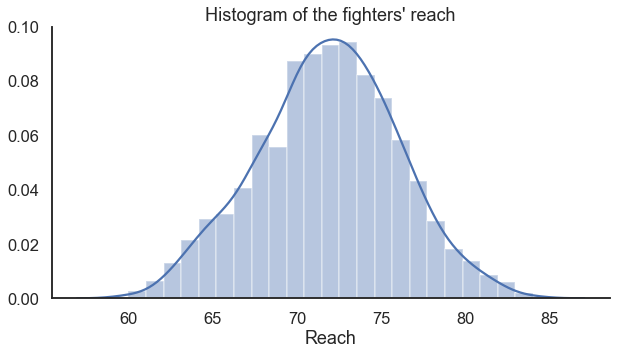

In [71]:
column_distplot(data_fighters, 'reach')

- As this reach distribution is approximately normally distributed with no extreme outliers, we will fill the na values with the mean value of reach

In [72]:
data_fighters.reach = data_fighters.reach.fillna(round(data_fighters.reach.mean(), 0))

#### Stance column

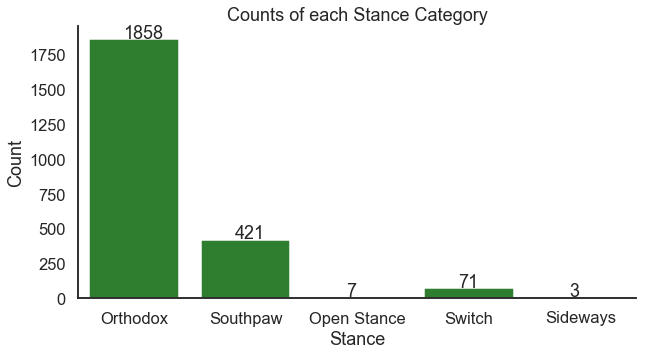

In [76]:
cm.column_countplot(data_fighters, 'stance', show_count=True)

- The vast majority of fighters fight in the orthodox stance, so it is easiest to fill the na values with this modal average

In [77]:
stance_mode_avg = data_fighters.stance.mode()[0]
data_fighters.stance.fillna(stance_mode_avg, inplace=True)

#### Dummy code Stance column

In [78]:
data_fighters = pd.get_dummies(data=data_fighters, columns=['stance'])
# rename so the column heading is 1 word
data_fighters.rename(columns = {'stance_Open Stance': 'stance_Open_Stance'}, inplace = True)

#### Calc average age to fill na

need to keep one of these tables to easily add it in at the end of cleaning

In [118]:
# How many dobs are missing?
missing_dobs = data_fighters['dob'].isna().sum() / data_fighters.shape[1]
print('{}% of fighter data of births are missing'.format(round(missing_dobs, 2)))

30.54% of fighter data of births are missing


In [ ]:
def calc_average

In [136]:
# DF of the dob for each fighter
fighters_dob = data_fighters[['name', 'dob']]
# fighters_dob.set_index('name', inplace=True)
fighters_dob.head(5)

,name,dob
0,Luciano Azevedo,1981-06-25
1,Michael Byrnes,1990-07-17
2,Gleidson Cutis,1989-02-07
3,Rolando Dy,1990-08-11
4,Jessica Eye,1986-07-27


In [167]:
bout_date = data_bouts['date']
f1_names = data_bouts['fighter1']
f1_dobs = 0 # fighters_dob['dob'][list(f1_names)]
f2_names = data_bouts['fighter2']
f2_dobs = 0 #fighters_dob['dob'][list(f2_names)]

temp_df = pd.DataFrame({'date': bout_date,
                        'fighter1': f1_names, 
                        'fighter2': f2_names})
temp_df.head(2)

,date,fighter1,fighter2
0,2018-11-17,Neil Magny,Santiago Ponzinibbio
1,2018-11-17,Darren Elkins,Ricardo Lamas


In [168]:
temp_df = temp_df.merge(fighters_dob, left_on='fighter1', right_on='name')
temp_df['fighter1_dob'] = temp_df['dob']
temp_df.drop(['name', 'dob'], axis=1, inplace=True)
temp_df.head(2)

In [169]:
temp_df = temp_df.merge(fighters_dob, left_on='fighter2', right_on='name')
temp_df['fighter2_dob'] = temp_df['dob']
temp_df.drop(['name', 'dob'], axis=1, inplace=True)
temp_df.head(2)

In [176]:
cm.calc_age_at_fight(temp_df, 'fighter1_age', 'fighter1_dob')
cm.calc_age_at_fight(temp_df, 'fighter2_age', 'fighter2_dob')
temp_df.head(2)

,date,fighter1,fighter2,fighter1_dob,fighter2_dob,fighter1_age,fighter2_age
0,2018-11-17,Neil Magny,Santiago Ponzinibbio,1987-08-03,1986-09-26,31.0,32.0
1,2017-07-16,Gunnar Nelson,Santiago Ponzinibbio,1988-07-28,1986-09-26,28.0,30.0


In [182]:
# Drop Na Values
temp_df['fighter1_age'].isna().sum()

137

In [183]:
temp_df.dropna(subset=['fighter1_age', 'fighter2_age'], inplace=True )

In [184]:
# Make 2 lists of ages into 1 list
fighter_ages = list(temp_df['fighter1_age']) + list(temp_df['fighter2_age'])
len(fighter_ages)

9222

Fighters' Ages Range from 18 to 51


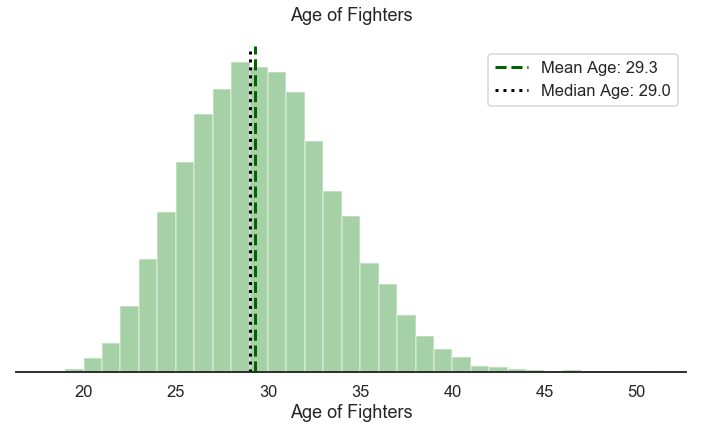

In [219]:
average_age = cm.plot_sns_displot_ages(fighter_ages, 'Age of Fighters')

In [220]:
average_age['mean']

29.310019518542614

Mean Age: 29.3


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


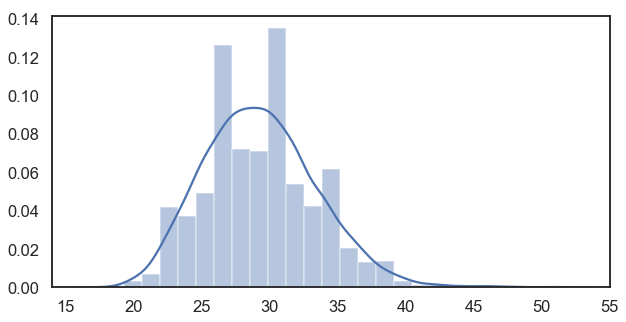

In [191]:
sns.distplot(fighter_ages, bins=25)

mean = np.mean(fighter_ages)
print('Mean Age: {}'.format(round(mean, 1)))

#### dob column

In [44]:
# Create the year of birth column (dob_year)
data_fighters['dob_year'] = 0
for index, value in enumerate(data_fighters['dob']):
    data_fighters['dob_year'][index] = data_fighters['dob'][index].year
    
today = datetime.date.today()

# Fighter's age_today = difference in today's year and their year of birth
data_fighters['age_today'] = today.year - data_fighters.dob_year

/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Age_today Skewness: 0.65
Age_today Kurtosis: 0.76
Age_today Mean: 36.56
Age_today Median: 36.0


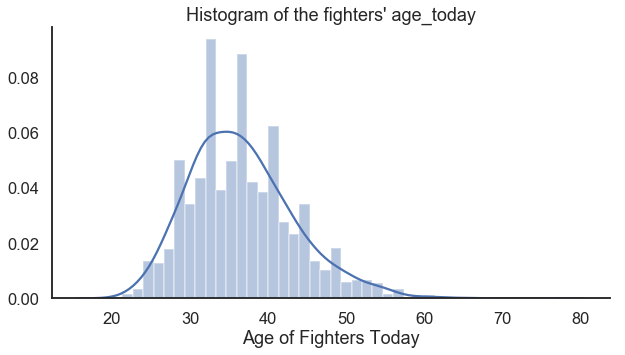

In [45]:
column_distplot(data_fighters, 'age_today', xlabel='Age of Fighters Today')

- The distribution of fighter ages is fairly normal, but due to the skewness and kurtosis we will choose to use the median age to fill in the NaN values.

In [46]:
# Calculate the median date of birth
dates = list(data_fighters.sort_values('dob')['dob'])
median_dob = dates[len(dates)//2]
print('The median date of birth is {}-{}-{}'.format(median_dob.year, median_dob.month, median_dob.day))

# Fill na values with this median date of birth
data_fighters.dob.fillna(median_dob, inplace=True)

The median date of birth is 1986-3-12


#### height column

In [47]:
# Drop ' and " signs
data_fighters['height'] = data_fighters['height'].str.replace("'","")
data_fighters['height'] = data_fighters['height'].str.replace('"',"")

In [48]:
# Calculate height in inches based off the feet and inches in height column
# Note that we can only perform the operation on columns that are not NaN
height_not_na = ~data_fighters['height'].isna()
data_fighters['height_inches'] = data_fighters['height'][height_not_na].apply(lambda x: parse_height(x))

Height_inches Skewness: 0.08
Height_inches Kurtosis: 0.32
Height_inches Mean: 70.39
Height_inches Median: 70.0


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


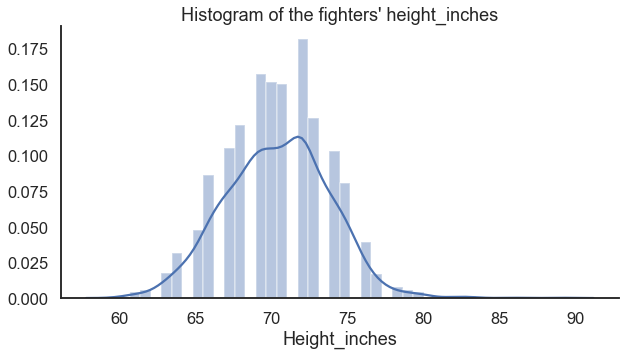

In [49]:
column_distplot(data_fighters, 'height_inches')

- We will use the mean height to fill in NaN values for height

In [50]:
height_inches_not_na = data_fighters['height_inches'][~data_fighters['height_inches'].isna()]
height_mean = height_inches_not_na.mean()
print('The mean height of a fighter is {} inches'.format(round(height_mean, 1)))

# Fill na values with this mean height
data_fighters.height_inches.fillna(height_mean, inplace=True)

The mean height of a fighter is 70.4 inches


#### Remove fighters with limited statistics

In [51]:
# Original number of fighters
total_fighters = len(data_fighters)
print('We have {} fighters in our original data.'.format(total_fighters))

# Fighters with no recorded stats
fight_statistics = ['SLpM', 'Str_Acc', 'SApM']
no_stat_fighters = len(data_fighters[(data_fighters[fight_statistics]==0).any(axis=1)])
print('There are {} fighters that have no statistics for the columns: {}.'.format(no_stat_fighters, fight_statistics))

# Reduced dataset size
data_fighters = data_fighters[~(data_fighters[fight_statistics]==0).any(axis=1)]
stat_fighters = len(data_fighters)
print('We therefore reduce the number of fighters in our data to {}.'.format(stat_fighters))

# Reset the index
data_fighters.reset_index(drop=True, inplace=True)

We have 3187 fighters in our original data.
There are 727 fighters that have no statistics for the columns: ['SLpM', 'Str_Acc', 'SApM'].
We therefore reduce the number of fighters in our data to 2460.


#### Check for Duplicate Names

In [52]:
if len(data_fighters) == data_fighters.fighter_id.nunique():
    print('The fighter_id column has only unique values')

The fighter_id column has only unique values


In [53]:
# calculate how many duplicated fighter names there are
non_unique_names = data_fighters.shape[0] - data_fighters.name.nunique()
print('The {} name(s) in the dataframe that is/are not unique are:'.format(non_unique_names))

# print out duplicated figher names
duplicate_names = list(data_fighters['name'][data_fighters.duplicated(subset="name")])
for i, name in zip(range(1,len(duplicate_names)+1), duplicate_names):
    print('\t{})'.format(i), name)

The 1 name(s) in the dataframe that is/are not unique are:
	1) Dong Hyun Kim


In [54]:
data_fighters[data_fighters.duplicated(subset="name", keep=False)]

,fighter_id,name,win,lose,draw,nc,height,weight,reach,dob,...,Sub_Avg,last_updated,stance_Open_Stance,stance_Orthodox,stance_Sideways,stance_Southpaw,stance_Switch,dob_year,age_today,height_inches
657,845,Dong Hyun Kim,16,8,3,0,5 11,155 lbs.,70.0,1988-09-09,...,0.0,2018-11-21 20:26:57.805101,0,1,0,0,0,1988.0,31.0,71.0
663,852,Dong Hyun Kim,22,4,1,1,6 2,170 lbs.,76.0,1981-11-17,...,0.6,2018-11-21 20:27:20.82459,0,0,0,1,0,1981.0,38.0,74.0


- It appears that each fighter is unique in the table above, as statistics such as date of birth (dob) and weight differ.  
- Upon further investigation, these are indeed two different fighters, with the 1st fighter (born 1988) changing his ring name to Dong Hyun Ma to avoid the confusion with Dont Hyun Kim (born 1981)
- We shall change the name of the 1st fighter Dong Hyun Kim (born 1988) to Dong Hyun Ma

In [55]:
# Check if there are any Dong Hyun Ma in the dataset
if len(data_fighters[data_fighters.name=='Dong Hyun Ma']):
    print('Dong Hyun Ma already exists')
else:
    # Find the right Dong Hyun Kim, who is now Dong Hyun Ma
    DongHyunMa = data_fighters['name']=='Dong Hyun Kim'
    DongHyunMa_dob = data_fighters['dob']=='1988-09-09'
    # Change name to Dong Hyun Ma
    data_fighters['name'][DongHyunMa & (DongHyunMa_dob)] = 'Dong Hyun Ma'
    print('Dong Hyun Kim 1988 has been renamed as Dong Hyun Ma')

Dong Hyun Kim 1988 has been renamed as Dong Hyun Ma


#### Drop Unecessary Columns

We now need to drop variables that have no likely impact on the outcome of a fight. 
- Weight: Although in reality a fighter's weight is extremely important, within a single fight, both fighter's weights will be within a narrow window and very similar to each other, i.e. any difference will be negligible

In [56]:
# Columns to drop
cols_to_drop = ['fighter_id',  'nc', 'height', 'weight', 'last_updated', 'dob_year']

# Drop the columns
data_fighters.drop(cols_to_drop, axis=1, inplace=True)

# View the narrower fighters dataframe
data_fighters.head(3)

,name,win,lose,draw,reach,dob,SLpM,Str_Acc,SApM,Str_Def,...,TD_Acc,TD_Def,Sub_Avg,stance_Open_Stance,stance_Orthodox,stance_Sideways,stance_Southpaw,stance_Switch,age_today,height_inches
0,Luciano Azevedo,16,9,1,72.0,1981-06-25,0.76,45,1.97,27,...,11,0,0.0,0,1,0,0,0,38.0,75.0
1,Gleidson Cutis,7,3,0,72.0,1989-02-07,2.99,52,8.28,59,...,0,0,0.0,0,1,0,0,0,30.0,69.0
2,Rolando Dy,9,7,1,69.0,1990-08-11,3.04,37,4.47,52,...,20,68,0.0,0,1,0,0,0,29.0,68.0


#### Add total_bouts column

In [57]:
# don't include nc values, as they do not useful in predicting a winner
# Also exclude draws as we want a binary outcome of win or lose
data_fighters['total_bouts'] = data_fighters['win'] + data_fighters['lose']

#### Add win rate column

In [58]:
data_fighters['win_rate'] = round(data_fighters['win'] / data_fighters['total_bouts'], 2)

#### Rearrange columns and group similar columns together

In [59]:
fighter_columns = data_fighters.columns
fighter_columns

Index(['name', 'win', 'lose', 'draw', 'reach', 'dob', 'SLpM', 'Str_Acc',
       'SApM', 'Str_Def', 'TD_Avg', 'TD_Acc', 'TD_Def', 'Sub_Avg',
       'stance_Open_Stance', 'stance_Orthodox', 'stance_Sideways',
       'stance_Southpaw', 'stance_Switch', 'age_today', 'height_inches',
       'total_bouts', 'win_rate'],
      dtype='object')

In [60]:
data_fighters = data_fighters[['name', 'dob', 'age_today',
                               'win', 'lose', 'draw', 'total_bouts', 'win_rate', 
                               'height_inches', 'reach',
                               'stance_Open_Stance', 'stance_Orthodox', 'stance_Sideways', 'stance_Southpaw', 'stance_Switch',
                               'SLpM', 'Str_Acc', 'SApM', 'Str_Def', 'TD_Avg', 'TD_Acc', 'TD_Def', 'Sub_Avg']]

#### Change all column headings to lower

In [61]:
data_fighters.columns = data_fighters.columns.str.lower()

### Fighters Data - Further Exploration

In [62]:
np.round(data_fighters.describe(), 2)

,age_today,win,lose,draw,total_bouts,win_rate,height_inches,reach,stance_open_stance,stance_orthodox,stance_sideways,stance_southpaw,stance_switch,slpm,sapm,td_avg,sub_avg
count,2185.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00
mean,36.10,13.12,5.51,0.31,18.63,0.70,70.32,71.90,0.00,0.82,0.00,0.16,0.03,2.78,3.45,1.48,0.77
std,6.35,8.36,4.52,0.87,11.69,0.15,3.38,3.19,0.05,0.39,0.02,0.36,0.16,1.86,2.36,1.84,1.45
min,20.00,0.00,0.00,0.00,1.00,0.00,60.00,60.00,0.00,0.00,0.00,0.00,0.00,0.06,0.13,0.00,0.00
25%,31.00,7.00,3.00,0.00,10.00,0.63,68.00,71.00,0.00,1.00,0.00,0.00,0.00,1.58,2.16,0.00,0.00
50%,36.00,12.00,4.00,0.00,16.00,0.71,70.00,72.00,0.00,1.00,0.00,0.00,0.00,2.54,3.00,1.00,0.20
75%,40.00,17.00,7.00,0.00,24.00,0.80,73.00,73.00,0.00,1.00,0.00,0.00,0.00,3.56,4.09,2.21,1.00
max,58.00,88.00,74.00,11.00,121.00,1.00,89.00,84.00,1.00,1.00,1.00,1.00,1.00,30.00,49.41,24.11,20.90


In [63]:
data_fighters[data_fighters.lose>30]

,name,dob,age_today,win,lose,draw,total_bouts,win_rate,height_inches,reach,...,stance_southpaw,stance_switch,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg
339,Ikuhisa Minowa,1976-01-12,43.0,51,32,8,83,0.61,69.0,72.0,...,0,0,0.88,40,1.66,49,1.82,41,5,1.9
1871,Vernon White,1971-12-03,48.0,26,33,2,59,0.44,72.0,72.0,...,1,0,2.11,38,2.20,54,0.88,28,44,0.0
2408,Shannon Ritch,1970-09-27,49.0,47,74,0,121,0.39,69.0,72.0,...,0,0,1.00,100,6.00,50,0.00,0,0,0.0


#### set name column into index

In [64]:
data_fighters.set_index('name', inplace=True)

#### Save the cleaned fighters df to processed data file

In [65]:
data_fighters.to_csv('../data/processed/fighters_cleaned')

## Home Country Data

In [66]:
fighter_stats_each_bout = pd.read_csv('../data/raw/fighter_stats_each_bout.csv.zip')

In [67]:
fighter_stats_each_bout.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [68]:
fighter_home_country = clean_fighter_data(fighter_stats_each_bout)

In [69]:
fighter_home_country.to_csv('../data/processed/fighter_home_country', index=False)

## Combine Dataframes
- Here we combine the bouts data with the fighters data, into 1 dataframe that will be used for the machine learning process
- We can only look at bouts where we have information on both fighters

In [70]:
bouts_cleaned = pd.read_csv('../data/processed/bouts_cleaned')
fighters_cleaned = pd.read_csv('../data/processed/fighters_cleaned',
                               index_col=0)

In [71]:
bouts_cleaned.head(3)

,date,location,fighter1,fighter2,winner_is_fighter1,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB
0,2018-11-17,Argentina,Santiago Ponzinibbio,Neil Magny,1,0,0,0,1,0
1,2018-11-17,Argentina,Darren Elkins,Ricardo Lamas,0,0,0,0,1,0
2,2018-11-17,Argentina,Johnny Walker,Khalil Rountree Jr.,1,0,0,0,1,0


### Drop bouts where we have no data on fighters

In [72]:
original_bout_length = len(bouts_cleaned)

# Create a list of all the fighters' names
name_list = fighters_cleaned.index.tolist()

# booleans if name in fighter1/figther2 column is in list of fighter names
f1_in_name_list = bouts_cleaned['fighter1'].isin(name_list)
f2_in_name_list = bouts_cleaned['fighter2'].isin(name_list)

# Drop rows where at least 1 of names does not appear in fighter names list
bouts_cleaned = bouts_cleaned[(f1_in_name_list) & (f2_in_name_list)]

# Print the action we have carried out
new_bout_length = len(bouts_cleaned)
print('We have reduced the number of bouts from {} to {}, as we do not have statistics for {} fighters'
      .format(original_bout_length, new_bout_length, original_bout_length-new_bout_length))

We have reduced the number of bouts from 4796 to 4570, as we do not have statistics for 226 fighters


### Create 2 new dataframes for fighter1 data and fighter2 data

In [73]:
# Pull in the statistics for each fighter1
data_fighter1 = fighters_cleaned.loc[bouts_cleaned["fighter1"]]
# Pull in the statistics for each fighter2
data_fighter2 = fighters_cleaned.loc[bouts_cleaned["fighter2"]]

# Add suffix to each new dataframe's columns so we can merge them
data_fighter1 = data_fighter1.add_prefix('fighter1_')
data_fighter2 = data_fighter2.add_prefix('fighter2_')

# Reset the indices so we can merge them
bouts_cleaned.reset_index(inplace=True, drop=True)
data_fighter1.reset_index(inplace=True)
data_fighter2.reset_index(inplace=True)

### Add Home Country to fighter1 and fighter2

In [74]:
data_fighter1 = data_fighter1.merge(fighter_home_country, how='left')
data_fighter2 = data_fighter2.merge(fighter_home_country, how='left')

In [75]:
# Rename columns so we can keep track of whos home country it is
data_fighter1.rename(index=str, columns={'home_country': 'fighter1_home_country'}, inplace=True)
data_fighter2.rename(index=str, columns={'home_country': 'fighter2_home_country'}, inplace=True)

data_fighter1.index = data_fighter1.index.astype('int64')
data_fighter2.index = data_fighter2.index.astype('int64')

### Create a combined dataframe of bouts with details of fighter1 and fighter2

In [76]:
# Create a merged dataframe
data_combined = pd.concat([bouts_cleaned, data_fighter1, data_fighter2], axis=1)
data_combined.tail(3)

,date,location,fighter1,fighter2,winner_is_fighter1,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB,...,fighter2_stance_switch,fighter2_slpm,fighter2_str_acc,fighter2_sapm,fighter2_str_def,fighter2_td_avg,fighter2_td_acc,fighter2_td_def,fighter2_sub_avg,fighter2_home_country
4567,2018-11-10,USA,Devonte Smith,Julian Erosa,1,0,0,0,1,0,...,0,4.91,52,5.20,45,1.64,60,75,1.1,USA
4568,2018-11-10,USA,Joseph Morales,Eric Shelton,0,0,1,0,0,0,...,0,2.75,44,1.63,65,3.40,51,43,0.2,USA
4569,2018-11-10,USA,Mark De La Rosa,Joby Sanchez,1,0,1,0,0,0,...,0,3.22,36,2.82,63,0.95,71,51,0.4,USA


In [77]:
# Drop the name columns (2 of them)
data_combined.drop(columns='name', inplace=True)

### Calculate fighter age at time of fight

In [78]:
# Convert appropriate columns to datetime
date_cols = ['date', 'fighter1_dob', 'fighter2_dob']
for col in date_cols:
    data_combined[col] = pd.to_datetime(data_combined[col], format='%Y-%m-%d', errors='coerce')

In [79]:
# Calculate age of fighters at time of fight
new_cols = ['fighter1_age_at_fight', 'fighter2_age_at_fight']
dobs = ['fighter1_dob', 'fighter2_dob']

for i in list(range(len(new_cols))):
    calc_age_at_fight(data_combined, new_cols[i], dobs[i])

### Add home advantage column

In [80]:
# 1 if the fighter is fighting at home, 0 if they do not
data_combined['fighter1_fight_at_home'] = (data_combined['fighter1_home_country'] == data_combined['location']) * 1
data_combined['fighter2_fight_at_home'] = (data_combined['fighter2_home_country'] == data_combined['location']) * 1

# 1 if fighter1 has a home advantage, 0.5 if its even, 0 if fighter2 has a home advantage
home_difference = data_combined['fighter1_fight_at_home'] - data_combined['fighter2_fight_at_home']
data_combined['fighter1_home_advantage'] = ((home_difference) + 1) / 2

In [81]:
# Bouts with information of home for fighter1 or fighter2
f1_home_not_na = ~data_combined['fighter1_home_country'].isna()
f2_home_not_na = ~data_combined['fighter2_home_country'].isna()

# Bouts with information on both fighters' home country
bouts_with_both_fighters_homes = len(data_combined[f1_home_not_na][f2_home_not_na])
total_bouts = len(data_combined)

# Percentage of bouts with information on both fighters' home country
pct_rows_with_homes = bouts_with_both_fighters_homes / total_bouts * 100
print('{}% of the bouts have information for home of both fighters'.format(round( pct_rows_with_homes, 0)))

55.0% of the bouts have information for home of both fighters


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


- As the data is so limited for where a fighter is from, we cannot use this data for now

### Remove columns that are not needed for modelling

In [82]:
cols_to_drop = ['location', 
                'fighter1_draw', 'fighter1_age_today', 'fighter1_dob',
                'fighter1_home_country', 'fighter1_fight_at_home',
                'fighter2_draw', 'fighter2_age_today', 'fighter2_dob',
                'fighter2_home_country', 'fighter2_fight_at_home',
                'fighter1_home_advantage',
                'method_DEC', 'method_DQ', 'method_KO/TKO', 'method_SUB']
data_combined.drop(labels=cols_to_drop, axis=1, inplace=True)

In [83]:
show_na_cols(data_combined)

There are no columns with na values in the dataframe


### Save combined dataframe to csv

In [84]:
data_combined.to_csv('../data/processed/combined', index=False)